In [38]:
from sklearn import metrics
import pandas as pd
import numpy as np
from tqdm import tqdm
import sys
import random
import queue
import time
import matplotlib.pyplot as plt

In [39]:
missing_values = ["?", "na", "--"]
df = pd.read_csv(r"C:\Users\prake\Downloads\COL774_mammography\COL774_mammography\train.csv", na_values = missing_values)
df.head(10)

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,4.0,46.0,4.0,3.0,3.0,0
1,5.0,64.0,3.0,3.0,3.0,1
2,4.0,71.0,4.0,5.0,3.0,1
3,5.0,42.0,4.0,5.0,3.0,0
4,6.0,63.0,1.0,1.0,3.0,0
5,5.0,40.0,4.0,3.0,3.0,1
6,4.0,54.0,1.0,1.0,3.0,0
7,5.0,66.0,4.0,3.0,3.0,1
8,5.0,51.0,4.0,NaN,NaN,1
9,NaN,52.0,4.0,4.0,3.0,0


In [40]:
df.isnull().sum()

BI-RADS assessment     2
Age                    5
Shape                 22
Margin                30
Density               44
Severity               0
dtype: int64

In [41]:
train= df.dropna()
train.head(10)

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,4.0,46.0,4.0,3.0,3.0,0
1,5.0,64.0,3.0,3.0,3.0,1
2,4.0,71.0,4.0,5.0,3.0,1
3,5.0,42.0,4.0,5.0,3.0,0
4,6.0,63.0,1.0,1.0,3.0,0
5,5.0,40.0,4.0,3.0,3.0,1
6,4.0,54.0,1.0,1.0,3.0,0
7,5.0,66.0,4.0,3.0,3.0,1
13,5.0,66.0,4.0,5.0,3.0,0
14,5.0,75.0,4.0,5.0,3.0,1


In [42]:
df1 = pd.read_csv(r"C:\Users\prake\Downloads\COL774_mammography\COL774_mammography\test.csv", na_values = missing_values)
df1.head()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5,71,4.0,5.0,3.0,0
1,4,51,NaN,NaN,3.0,0
2,4,66,3.0,3.0,3.0,0
3,4,45,2.0,1.0,NaN,0
4,4,54,4.0,4.0,NaN,1


In [43]:
test= df1.dropna()
test.head()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5,71,4.0,5.0,3.0,0
2,4,66,3.0,3.0,3.0,0
5,4,47,2.0,4.0,2.0,0
6,4,70,2.0,1.0,3.0,0
7,5,76,4.0,4.0,3.0,1


In [44]:
df2 = pd.read_csv(r"C:\Users\prake\Downloads\COL774_mammography\COL774_mammography\val.csv", na_values = missing_values)
df2.head()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,4,40,3.0,4.0,NaN,0
1,4,38,2.0,1.0,3.0,0
2,4,49,2.0,1.0,1.0,0
3,4,42,2.0,1.0,3.0,0
4,2,59,NaN,4.0,3.0,0


In [45]:
val= df2.dropna()
val.head()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
1,4,38,2.0,1.0,3.0,0
2,4,49,2.0,1.0,1.0,0
3,4,42,2.0,1.0,3.0,0
5,4,50,1.0,1.0,3.0,0
6,4,33,1.0,1.0,3.0,0


In [46]:
X_train = train.drop(['Severity','BI-RADS assessment' ], axis=1)
y_train = train['Severity']
X_test = test.drop(['Severity','BI-RADS assessment' ], axis=1)
y_test = test['Severity']
X_val = val.drop(['Severity','BI-RADS assessment' ], axis=1)
y_val = val['Severity']

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
#Predict the Test set results with criterion entropy¶
y_pred_en = clf_en.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.6996


In [17]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [18]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9253


In [19]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))
print('Validation set score: {:.4f}'.format(clf_en.score(X_val, y_val)))

Training set score: 0.9253
Test set score: 0.6996
Validation set score: 0.7521


[Text(0.45579954954954954, 0.9761904761904762, 'X[2] <= 1.5\nentropy = 0.999\nsamples = 455\nvalue = [236, 219]'),
 Text(0.25591216216216217, 0.9285714285714286, 'X[0] <= 64.5\nentropy = 0.536\nsamples = 180\nvalue = [158, 22]'),
 Text(0.178490990990991, 0.8809523809523809, 'X[0] <= 34.5\nentropy = 0.414\nsamples = 156\nvalue = [143, 13]'),
 Text(0.16948198198198197, 0.8333333333333334, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.1875, 0.8333333333333334, 'X[0] <= 61.5\nentropy = 0.479\nsamples = 126\nvalue = [113, 13]'),
 Text(0.178490990990991, 0.7857142857142857, 'X[1] <= 2.5\nentropy = 0.515\nsamples = 113\nvalue = [100, 13]'),
 Text(0.11373873873873874, 0.7380952380952381, 'X[3] <= 2.5\nentropy = 0.469\nsamples = 100\nvalue = [90, 10]'),
 Text(0.10472972972972973, 0.6904761904761905, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.12274774774774774, 0.6904761904761905, 'X[0] <= 60.5\nentropy = 0.511\nsamples = 88\nvalue = [78, 10]'),
 Text(0.11373873873873874

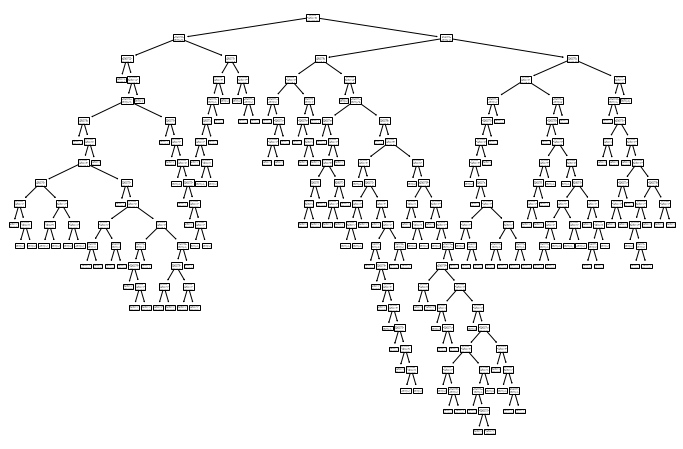

In [20]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

# 2 grid search 

In [100]:
    from sklearn import decomposition, datasets
    from sklearn import tree
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import StandardScaler

In [128]:
grid_space={'max_depth':[3,4,5,6,7,8,9,10],
            'min_samples_leaf':[3,4,5,6,7],
            'min_samples_split':[3,4,5,6,7,8]
           }

In [129]:
grid = GridSearchCV(clf_en,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid_train= grid.fit(X_train,y_train)

In [130]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 7}
Best score is: 0.7845939351690484


now we will computer accuracy for test and validation set 

In [147]:
grid_search_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, min_samples_split= 7)
grid_search_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=7)

In [151]:
print('Training set score: {:.4f}'.format(grid_search_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(grid_search_model.score(X_test, y_test)))
print('Validation set score: {:.4f}'.format(grid_search_model.score(X_val, y_val)))

Training set score: 0.8220
Test set score: 0.7391
Validation set score: 0.8512


[Text(0.40384615384615385, 0.9166666666666666, 'X[2] <= 1.5\nentropy = 0.999\nsamples = 455\nvalue = [236, 219]'),
 Text(0.14102564102564102, 0.75, 'X[0] <= 64.5\nentropy = 0.536\nsamples = 180\nvalue = [158, 22]'),
 Text(0.05128205128205128, 0.5833333333333334, 'X[0] <= 34.5\nentropy = 0.414\nsamples = 156\nvalue = [143, 13]'),
 Text(0.02564102564102564, 0.4166666666666667, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.07692307692307693, 0.4166666666666667, 'X[0] <= 61.5\nentropy = 0.479\nsamples = 126\nvalue = [113, 13]'),
 Text(0.05128205128205128, 0.25, 'X[1] <= 2.5\nentropy = 0.515\nsamples = 113\nvalue = [100, 13]'),
 Text(0.02564102564102564, 0.08333333333333333, 'entropy = 0.469\nsamples = 100\nvalue = [90, 10]'),
 Text(0.07692307692307693, 0.08333333333333333, 'entropy = 0.779\nsamples = 13\nvalue = [10, 3]'),
 Text(0.10256410256410256, 0.25, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.23076923076923078, 0.5833333333333334, 'X[1] <= 1.5\nentropy = 0.954

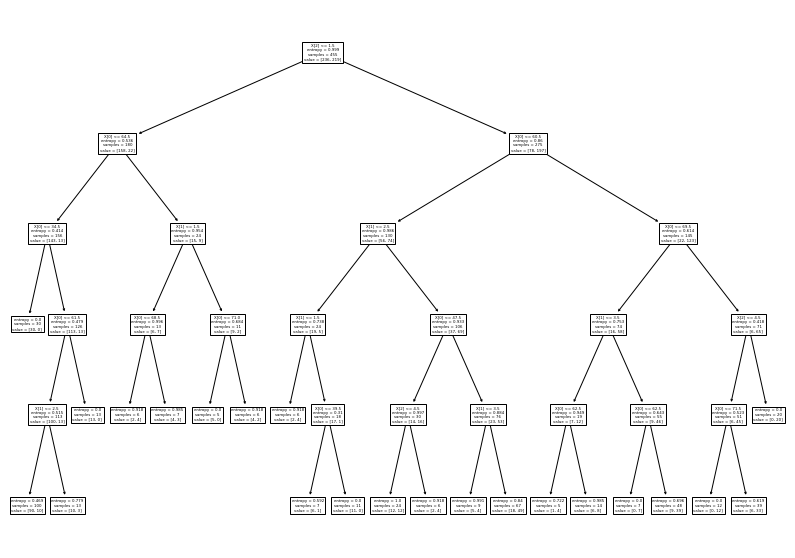

In [153]:
plt.figure(figsize=(14,10))
from sklearn import tree
tree.plot_tree(grid_search_model.fit(X_train, y_train))

# Post Pruning 

In [54]:
#define a base tree with basuc parameters 
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.46520147e-04
 1.46520147e-04 2.01465201e-04 3.49650350e-04 3.66300366e-04
 3.66300366e-04 3.66300366e-04 3.66300366e-04 3.66300366e-04
 4.05748098e-04 4.39560440e-04 4.39560440e-04 5.49450549e-04
 5.63539025e-04 5.86080586e-04 6.59340659e-04 7.15381485e-04
 7.32600733e-04 7.32600733e-04 7.32600733e-04 7.32600733e-04
 8.37257980e-04 8.45308538e-04 8.79120879e-04 9.06845584e-04
 9.41915228e-04 1.05427905e-03 1.19483691e-03 1.28526444e-03
 1.29436864e-03 1.32953466e-03 1.38380138e-03 1.52456576e-03
 1.53497296e-03 1.53935298e-03 1.64653600e-03 1.66646540e-03
 1.74400498e-03 1.75824176e-03 1.83150183e-03 1.85592186e-03
 1.88383046e-03 1.89310689e-03 1.95804196e-03 2.04021331e-03
 2.15538438e-03 2.34432234e-03 2.38219055e-03 2.66400266e-03
 2.83259161e-03 2.92581205e-03 2.93040293e-03 3.01237224e-03
 3.79684418e-03 5.75035882e-03 7.38705739e-03 7.77777778e-03
 1.68513586e-02 2.34609740e-02 1.68807622e-01]


In [61]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

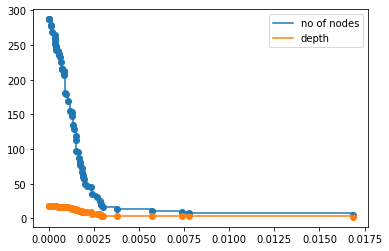

In [62]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

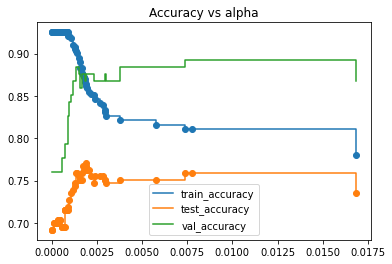

In [66]:
train_acc = []
test_acc = []
val_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    y_val_pred= c.predict(X_val)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
    val_acc.append(accuracy_score(y_val_pred,y_val))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,val_acc,label='val_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [67]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.005)
clf_.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_val_pred = clf.predict(X_val)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
print(f'Test score {accuracy_score(y_val_pred,y_val)}')

Train score 0.7802197802197802
Test score 0.7351778656126482
Test score 0.8677685950413223


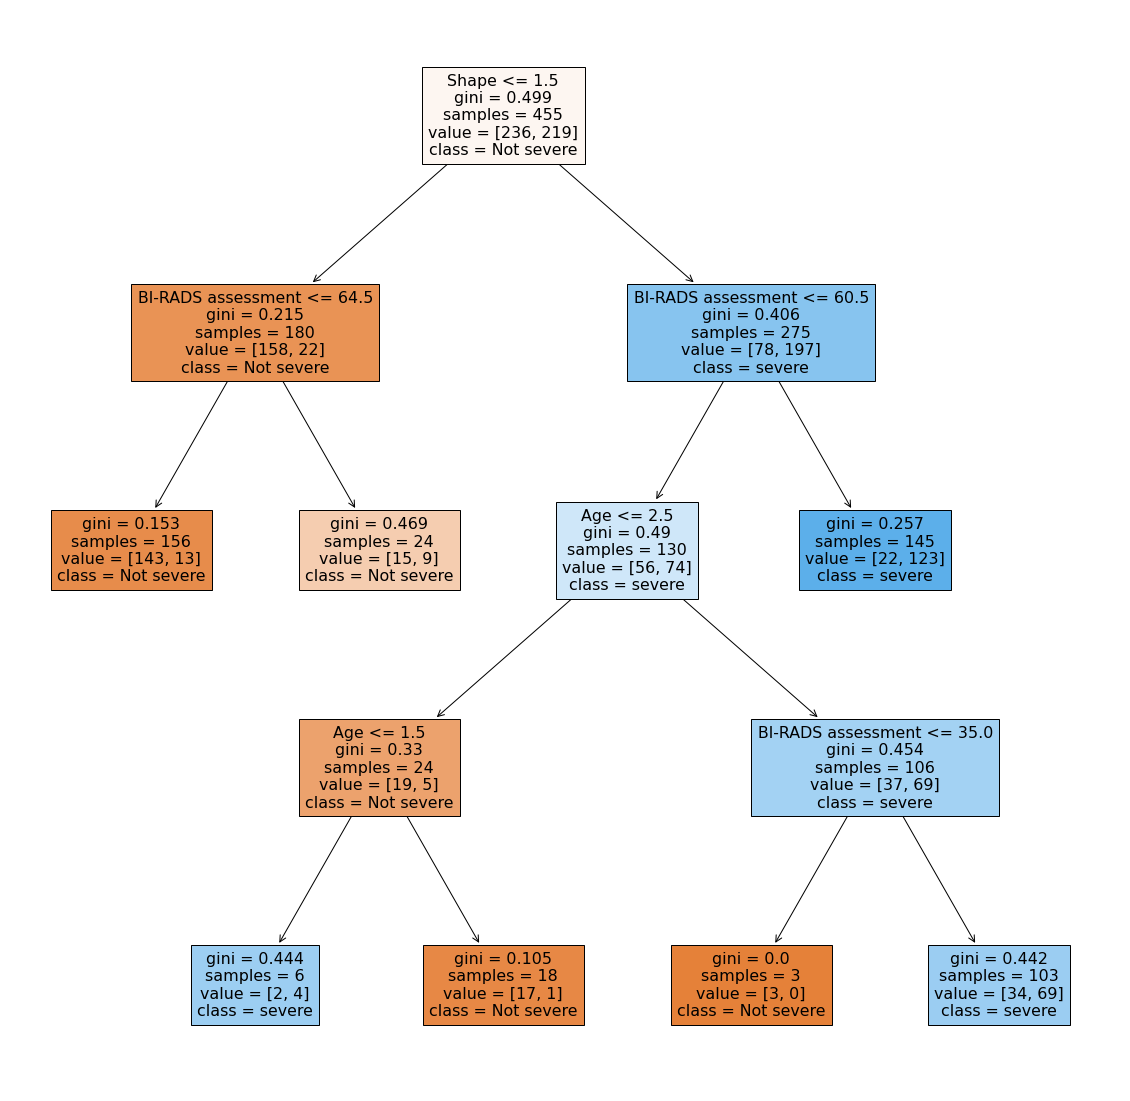

In [68]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not severe','severe']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

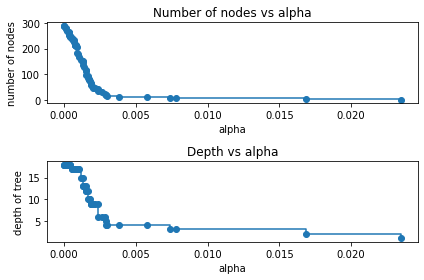

In [57]:
#Here we show that the number of nodes and tree depth decreases as alpha increases.
base_trees= base_trees[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [base_tree.tree_.node_count for base_tree in base_trees]
depth = [base_tree.tree_.max_depth for base_tree in base_trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# random forest 

In [128]:
from sklearn.ensemble import RandomForestClassifier 

In [21]:
forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
forest.fit(X_train, y_train)
print('Score: ', forest.score(X_train, y_train))

Score:  0.9252747252747253


In [22]:
print(forest.oob_score_)

0.7516483516483516


As expected the accuracy of the model when evaluating the training set is very high. However, this is meaningless because you can very well be overfitting your data and thus your model is rubbish. However, we can use the out-of-bag score as This is the accuracy whilst evaluating our instances in the training set using only the trees for which they were omitted.

In [23]:
print('Score: ', forest.score(X_test, y_test))
print('Score: ', forest.score(X_val, y_val))

Score:  0.7391304347826086
Score:  0.8264462809917356


) n estimators (b) max features (c) min samples split

In [25]:
n_features= 4
forest1= forest = RandomForestClassifier(n_estimators = 100, oob_score = True, min_samples_split=3, max_features=n_features)
forest1.fit(X_train, y_train)
print('Score: ', forest1.score(X_train, y_train))

Score:  0.9208791208791208


In [26]:
print(forest1.oob_score_)

0.7472527472527473


In [27]:
print('Score: ', forest1.score(X_test, y_test))
print('Score: ', forest1.score(X_val, y_val))

Score:  0.7509881422924901
Score:  0.8429752066115702


In [42]:
n_features= 4
forest2= RandomForestClassifier(n_estimators = 150, oob_score = True, min_samples_split=5, max_features=n_features)
forest2.fit(X_train, y_train)
print('Score: ', forest1.score(X_train, y_train))

Score:  0.9142857142857143


In [43]:
print('Score: ', forest2.score(X_test, y_test))
print('Score: ', forest2.score(X_val, y_val))

Score:  0.7628458498023716
Score:  0.8677685950413223


In [48]:
print(forest2.oob_score_)

0.7428571428571429


gridsearch over random forest 

In [57]:
grid_space={'n_estimators':[25,50,75,100,125,150],
            'min_samples_split':[3,4,5,6,7,8],
            'max_features': [2,3,4]
           }

In [58]:
grid_rf = GridSearchCV(forest,param_grid=grid_space,cv=3,scoring='accuracy')
model_rf= grid_rf.fit(X_train,y_train)

In [59]:
print('Best hyperparameters are: '+str(model_rf.best_params_))
print('Best score is: '+str(model_rf.best_score_))

Best hyperparameters are: {'max_features': 2, 'min_samples_split': 8, 'n_estimators': 125}
Best score is: 0.7802660625072616


In [60]:
forest_gs= RandomForestClassifier(max_features= 2, min_samples_split= 8, n_estimators= 125, oob_score= True)
forest_gs.fit(X_train, y_train)
print('Score: ', forest_gs.score(X_train, y_train))

Score:  0.8703296703296703


In [61]:
print('Training set score: {:.4f}'.format(forest_gs.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(forest_gs.score(X_test, y_test)))
print('Validation set score: {:.4f}'.format(forest_gs.score(X_val, y_val)))

Training set score: 0.8703
Test set score: 0.7826
Validation set score: 0.8843


In [62]:
print(forest_gs.oob_score_)

0.7648351648351648


# Missing data imputation median

In [69]:
train_med= df.fillna(df.median())

In [70]:
train_med.head(10)

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,4.0,46.0,4.0,3.0,3.0,0
1,5.0,64.0,3.0,3.0,3.0,1
2,4.0,71.0,4.0,5.0,3.0,1
3,5.0,42.0,4.0,5.0,3.0,0
4,6.0,63.0,1.0,1.0,3.0,0
5,5.0,40.0,4.0,3.0,3.0,1
6,4.0,54.0,1.0,1.0,3.0,0
7,5.0,66.0,4.0,3.0,3.0,1
8,5.0,51.0,4.0,3.0,3.0,1
9,4.0,52.0,4.0,4.0,3.0,0


In [71]:
test_med= df1.fillna(df1.median())
test_med.head()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5,71,4.0,5.0,3.0,0
1,4,51,3.0,3.0,3.0,0
2,4,66,3.0,3.0,3.0,0
3,4,45,2.0,1.0,3.0,0
4,4,54,4.0,4.0,3.0,1


In [72]:
val_med= df2.fillna(df2.median())
val_med.head()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,4,40,3.0,4.0,3.0,0
1,4,38,2.0,1.0,3.0,0
2,4,49,2.0,1.0,1.0,0
3,4,42,2.0,1.0,3.0,0
4,2,59,3.0,4.0,3.0,0


In [73]:
X_train_med = train_med.drop(['Severity','BI-RADS assessment' ], axis=1)
y_train_med = train_med['Severity']
X_test_med = test_med.drop(['Severity','BI-RADS assessment' ], axis=1)
y_test_med = test_med['Severity']
X_val_med = val_med.drop(['Severity','BI-RADS assessment' ], axis=1)
y_val_med = val_med['Severity']

In [120]:
X_train_med.head()

,Age,Shape,Margin,Density
0,46.0,4.0,3.0,3.0
1,64.0,3.0,3.0,3.0
2,71.0,4.0,5.0,3.0
3,42.0,4.0,5.0,3.0
4,63.0,1.0,1.0,3.0


In [88]:
tree_med= DecisionTreeClassifier(random_state=0)

In [90]:
tree_med.fit(X_train_med, y_train_med)

DecisionTreeClassifier(random_state=0)

In [96]:
from sklearn.metrics import accuracy_score
y_pred_test_med = tree_med.predict(X_test_med)
y_pred_val_med = tree_med.predict(X_val_med)

In [97]:
print('test-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test_med, y_pred_test_med)))
print('validation-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val_med, y_pred_val_med)))

test-set accuracy score: 0.7361
validation-set accuracy score: 0.7407


In [98]:
print('Training set score: {:.4f}'.format(tree_med.score(X_train_med, y_train_med)))
print('Test set score: {:.4f}'.format(tree_med.score(X_test_med, y_test_med)))
print('Validation set score: {:.4f}'.format(tree_med.score(X_val_med, y_val_med)))

Training set score: 0.9181
Test set score: 0.7361
Validation set score: 0.7407


[Text(0.40128173828125, 0.9722222222222222, 'X[2] <= 1.5\ngini = 0.497\nsamples = 537\nvalue = [288, 249]'),
 Text(0.21728515625, 0.9166666666666666, 'X[0] <= 73.5\ngini = 0.21\nsamples = 201\nvalue = [177, 24]'),
 Text(0.1783203125, 0.8611111111111112, 'X[0] <= 64.5\ngini = 0.185\nsamples = 194\nvalue = [174, 20]'),
 Text(0.131640625, 0.8055555555555556, 'X[0] <= 34.5\ngini = 0.158\nsamples = 174\nvalue = [159, 15]'),
 Text(0.125390625, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.137890625, 0.75, 'X[1] <= 2.5\ngini = 0.191\nsamples = 140\nvalue = [125, 15]'),
 Text(0.10703125, 0.6944444444444444, 'X[0] <= 61.5\ngini = 0.171\nsamples = 127\nvalue = [115, 12]'),
 Text(0.10078125, 0.6388888888888888, 'X[0] <= 57.5\ngini = 0.191\nsamples = 112\nvalue = [100, 12]'),
 Text(0.0640625, 0.5833333333333334, 'X[0] <= 44.5\ngini = 0.156\nsamples = 94\nvalue = [86, 8]'),
 Text(0.034375, 0.5277777777777778, 'X[0] <= 40.5\ngini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.01875,

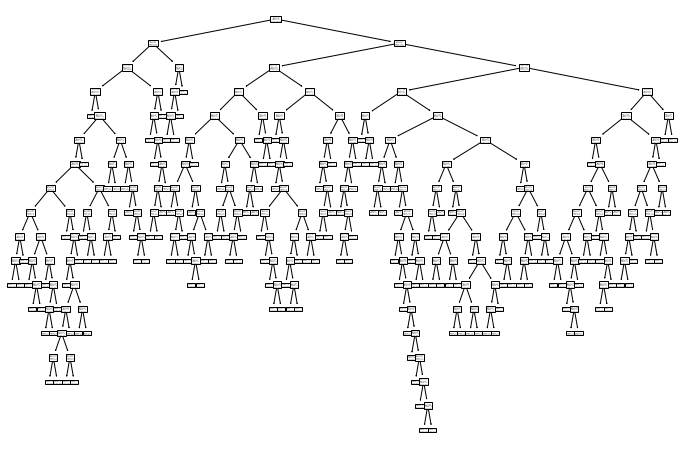

In [190]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(tree_med.fit(X_train_med, y_train_med)) 

In [191]:
grid_space={'max_depth':[3,4,5,6,7,8,9,10],
            'min_samples_leaf':[3,4,5,6,7],
            'min_samples_split':[3,4,5,6,7,8]
           }

In [192]:
grid = GridSearchCV(tree_med,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid_train_med= grid.fit(X_train_med,y_train_med)

In [193]:
print('Best hyperparameters are: '+str(model_grid_train_med.best_params_))
print('Best score is: '+str(model_grid_train_med.best_score_))

Best hyperparameters are: {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}
Best score is: 0.7728119180633147


In [194]:
grid_search_model_med= DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3, min_samples_split= 3)
grid_search_model_med.fit(X_train_med, y_train_med)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       min_samples_split=3)

In [195]:
print('Training set score: {:.4f}'.format(grid_search_model_med.score(X_train_med, y_train_med)))
print('Test set score: {:.4f}'.format(grid_search_model_med.score(X_test_med, y_test_med)))
print('Validation set score: {:.4f}'.format(grid_search_model_med.score(X_val_med, y_val_med)))

Training set score: 0.8138
Test set score: 0.7882
Validation set score: 0.8519


[Text(0.45689655172413796, 0.9, 'X[2] <= 1.5\nentropy = 0.996\nsamples = 537\nvalue = [288, 249]'),
 Text(0.1896551724137931, 0.7, 'X[0] <= 64.5\nentropy = 0.528\nsamples = 201\nvalue = [177, 24]'),
 Text(0.06896551724137931, 0.5, 'X[0] <= 34.5\nentropy = 0.424\nsamples = 174\nvalue = [159, 15]'),
 Text(0.034482758620689655, 0.3, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.10344827586206896, 0.3, 'X[0] <= 61.5\nentropy = 0.491\nsamples = 140\nvalue = [125, 15]'),
 Text(0.06896551724137931, 0.1, 'entropy = 0.529\nsamples = 125\nvalue = [110, 15]'),
 Text(0.13793103448275862, 0.1, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.3103448275862069, 0.5, 'X[1] <= 1.5\nentropy = 0.918\nsamples = 27\nvalue = [18, 9]'),
 Text(0.2413793103448276, 0.3, 'X[0] <= 67.0\nentropy = 1.0\nsamples = 14\nvalue = [7, 7]'),
 Text(0.20689655172413793, 0.1, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.27586206896551724, 0.1, 'entropy = 0.991\nsamples = 9\nvalue = [5, 4]'),
 T

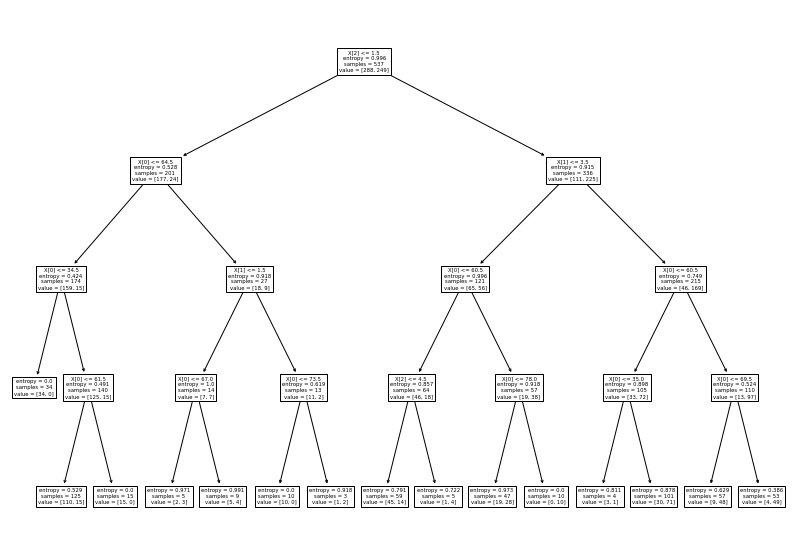

In [196]:
plt.figure(figsize=(14,10))
from sklearn import tree
tree.plot_tree(grid_search_model_med.fit(X_train_med, y_train_med))

In [74]:
#define a base tree with basuc parameters 
base_tree = DecisionTreeClassifier(random_state=0)
path = base_tree.cost_complexity_pruning_path(X_train_med, y_train_med)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.24146493e-04, 1.24146493e-04, 1.55183116e-04, 2.79329609e-04,
       3.10366232e-04, 3.10366232e-04, 3.10366232e-04, 3.10366232e-04,
       3.10366232e-04, 3.10366232e-04, 3.72439479e-04, 4.13821643e-04,
       4.65549348e-04, 4.65549348e-04, 4.65549348e-04, 4.65549348e-04,
       4.96585971e-04, 5.04345127e-04, 5.09318945e-04, 5.21415270e-04,
       6.20732464e-04, 6.20732464e-04, 6.20732464e-04, 6.20732464e-04,
       6.20732464e-04, 6.25905235e-04, 6.98324022e-04, 6.98324022e-04,
       7.32464308e-04, 7.75915580e-04, 7.98084597e-04, 8.20164921e-04,
       9.45878041e-04, 9.58401982e-04, 9.83323784e-04, 1.03455411e-03,
       1.04519524e-03, 1.07804761e-03, 1.10352438e-03, 1.10744315e-03,
       1.10845083e-03, 1.11731844e-03, 1.16151743e-03, 1.24146493e-03,
       1.29319263e-03, 1.32251155e-03, 1.33014099e-03, 1.35818385e-03,
       1.46787400e-03, 1.48411489e-03, 1.48975791e-03, 1.55183116e-03,
      

In [75]:
clfs = []
for ccp_alpha in ccp_alphas:
    base_tree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    base_tree.fit(X_train_med, y_train_med)
    clfs.append(base_tree)

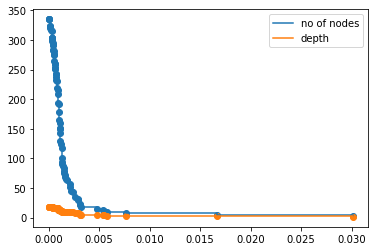

In [76]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

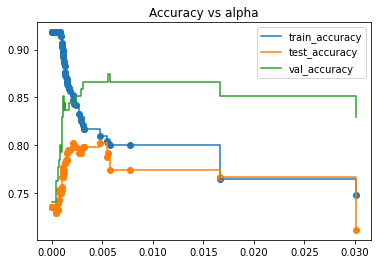

In [80]:
train_acc = []
test_acc = []
val_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train_med)
    y_test_pred = c.predict(X_test_med)
    y_val_pred= c.predict(X_val_med)
    train_acc.append(accuracy_score(y_train_pred,y_train_med))
    test_acc.append(accuracy_score(y_test_pred,y_test_med))
    val_acc.append(accuracy_score(y_val_pred,y_val_med))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,val_acc,label='val_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [81]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.015)
clf_.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_val_pred = clf.predict(X_val)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
print(f'Test score {accuracy_score(y_val_pred,y_val)}')

Train score 0.7802197802197802
Test score 0.7351778656126482
Test score 0.8677685950413223


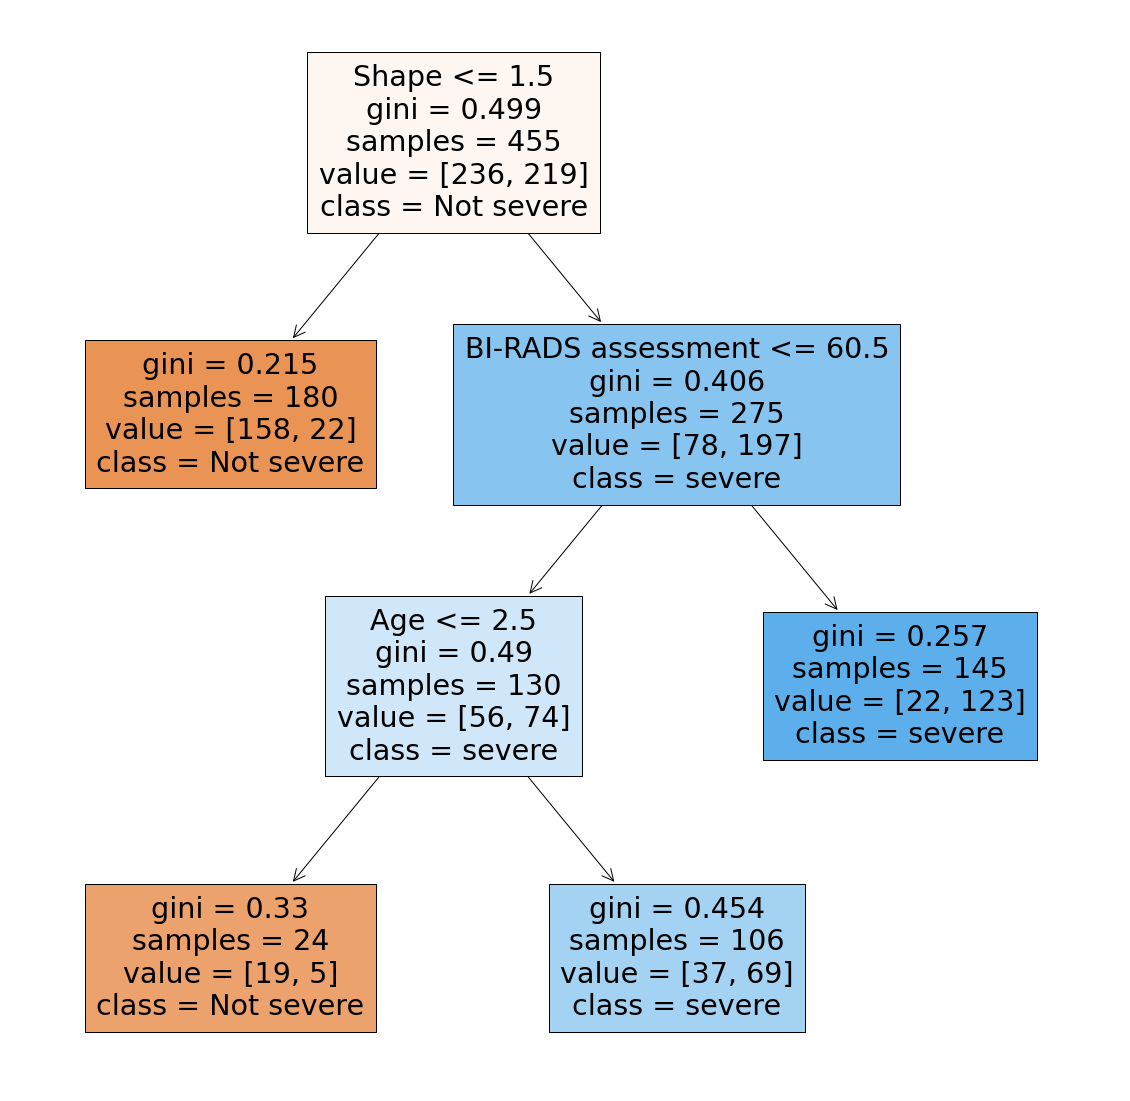

In [82]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not severe','severe']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

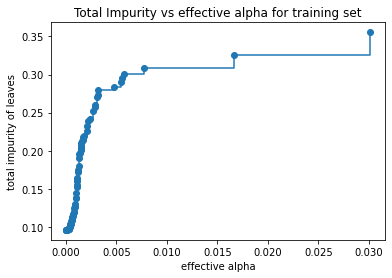

In [123]:
#In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [124]:
#we train a decision tree using the effective alphas. 
#The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.
base_trees = []
for ccp_alpha in ccp_alphas:
    base_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    base_tree.fit(X_train, y_train)
    base_trees.append(base_tree)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        base_trees[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.14181457705875122


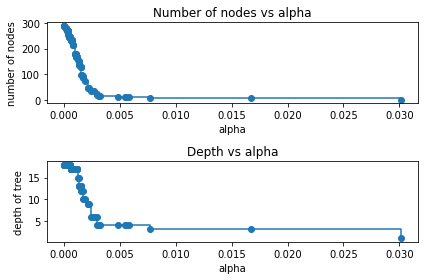

In [125]:
#Here we show that the number of nodes and tree depth decreases as alpha increases.
base_trees= base_trees[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [base_tree.tree_.node_count for base_tree in base_trees]
depth = [base_tree.tree_.max_depth for base_tree in base_trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

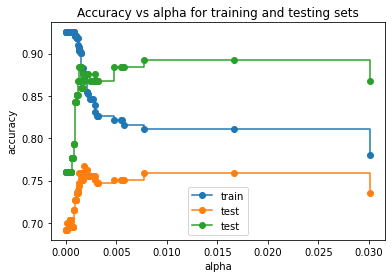

In [126]:
train_scores = [base_tree.score(X_train, y_train) for base_tree in base_trees]
test_scores = [base_tree.score(X_test, y_test) for base_tree in base_trees]
val_scores= [base_tree.score(X_val, y_val) for base_tree in base_trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. 
#As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better

In [129]:
forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
forest.fit(X_train, y_train)
print('Score: ', forest.score(X_train_med, y_train_med))

Score:  0.8864059590316573


In [130]:
print(forest.oob_score_)

0.7362637362637363


In [131]:
print('Score: ', forest.score(X_test_med, y_test_med))
print('Score: ', forest.score(X_val_med, y_val_med))

Score:  0.75
Score:  0.8074074074074075


In [132]:
grid_space={'n_estimators':[25,50,75,100,125,150],
            'min_samples_split':[3,4,5,6,7,8],
            'max_features': [2,3,4]
           }

In [133]:
grid_rf = GridSearchCV(forest,param_grid=grid_space,cv=3,scoring='accuracy')
model_rf= grid_rf.fit(X_train_med,y_train_med)

In [134]:
print('Best hyperparameters are: '+str(model_rf.best_params_))
print('Best score is: '+str(model_rf.best_score_))

Best hyperparameters are: {'max_features': 3, 'min_samples_split': 8, 'n_estimators': 125}
Best score is: 0.7653631284916201


In [138]:
forest_gs= RandomForestClassifier(max_features= 3, min_samples_split= 8, n_estimators= 125, oob_score= True)
forest_gs.fit(X_train_med, y_train_med)
print('Score: ', forest_gs.score(X_train_med, y_train_med))

Score:  0.8659217877094972


In [139]:
print('Training set score: {:.4f}'.format(forest_gs.score(X_train_med, y_train_med)))
print('Test set score: {:.4f}'.format(forest_gs.score(X_test_med, y_test_med)))
print('Validation set score: {:.4f}'.format(forest_gs.score(X_val_med, y_val_med)))

Training set score: 0.8659
Test set score: 0.7812
Validation set score: 0.8593


In [140]:
print(forest_gs.oob_score_)

0.7672253258845437


# mode

In [83]:
X_train_mode = train.drop(['Severity','BI-RADS assessment' ], axis=1)
y_train_mode = train['Severity']
X_test_mode = test.drop(['Severity','BI-RADS assessment' ], axis=1)
y_test_mode = test['Severity']
X_val_mode = val.drop(['Severity','BI-RADS assessment' ], axis=1)
y_val_mode = val['Severity']

In [183]:
X_train_mode.head()

,Age,Shape,Margin,Density
0,46.0,4.0,3.0,3.0
1,64.0,3.0,3.0,3.0
2,71.0,4.0,5.0,3.0
3,42.0,4.0,5.0,3.0
4,63.0,1.0,1.0,3.0


In [85]:
tree_mode= DecisionTreeClassifier(random_state=0)

In [86]:
tree_mode.fit(X_train_mode, y_train_mode)

DecisionTreeClassifier(random_state=0)

In [87]:
print('Training set score: {:.4f}'.format(tree_mode.score(X_train_mode, y_train_mode)))
print('Test set score: {:.4f}'.format(tree_mode.score(X_test_mode, y_test_mode)))
print('Validation set score: {:.4f}'.format(tree_mode.score(X_val_mode, y_val_mode)))

Training set score: 0.9253
Test set score: 0.6917
Validation set score: 0.7603


[Text(0.44504950495049506, 0.9736842105263158, 'X[2] <= 1.5\ngini = 0.499\nsamples = 455\nvalue = [236, 219]'),
 Text(0.23193069306930694, 0.9210526315789473, 'X[0] <= 64.5\ngini = 0.215\nsamples = 180\nvalue = [158, 22]'),
 Text(0.15297029702970297, 0.868421052631579, 'X[0] <= 34.5\ngini = 0.153\nsamples = 156\nvalue = [143, 13]'),
 Text(0.14504950495049504, 0.8157894736842105, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.1608910891089109, 0.8157894736842105, 'X[1] <= 2.5\ngini = 0.185\nsamples = 126\nvalue = [113, 13]'),
 Text(0.10594059405940594, 0.7631578947368421, 'X[0] <= 43.5\ngini = 0.161\nsamples = 113\nvalue = [103, 10]'),
 Text(0.04356435643564356, 0.7105263157894737, 'X[0] <= 40.5\ngini = 0.252\nsamples = 27\nvalue = [23, 4]'),
 Text(0.015841584158415842, 0.6578947368421053, 'X[1] <= 1.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.007920792079207921, 0.6052631578947368, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.023762376237623763, 0.6052631578

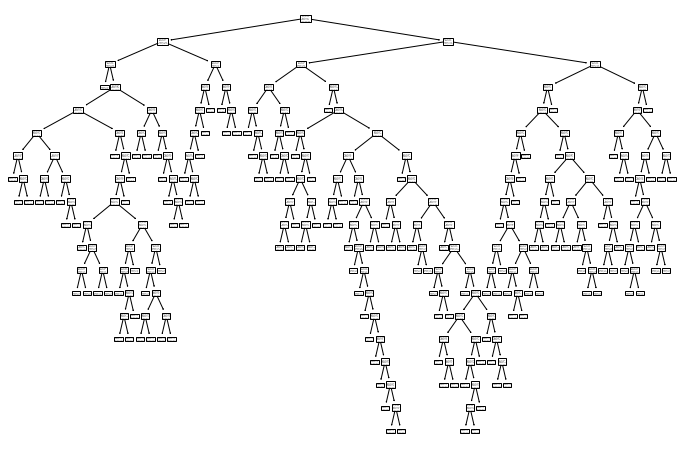

In [88]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(tree_mode.fit(X_train_mode, y_train_mode)) 

In [188]:
grid_space={'max_depth':[3,4,5,6,7,8,9,10],
            'min_samples_leaf':[3,4,5,6,7],
            'min_samples_split':[3,4,5,6,7,8]
           }

In [200]:
grid = GridSearchCV(tree_med,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid_train_mode= grid.fit(X_train_mode,y_train_mode)

In [201]:
print('Best hyperparameters are: '+str(model_grid_train_mode.best_params_))
print('Best score is: '+str(model_grid_train_mode.best_score_))

Best hyperparameters are: {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 3}
Best score is: 0.7823864296502846


In [202]:
grid_search_model_mode= DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6, min_samples_split= 3)
grid_search_model_mode.fit(X_train_mode, y_train_mode)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,
                       min_samples_split=3)

In [203]:
print('Training set score: {:.4f}'.format(model_grid_train_mode.score(X_train_mode, y_train_mode)))
print('Test set score: {:.4f}'.format(model_grid_train_mode.score(X_test_mode, y_test_mode)))
print('Validation set score: {:.4f}'.format(model_grid_train_mode.score(X_val_mode, y_val_mode)))

Training set score: 0.8132
Test set score: 0.7549
Validation set score: 0.8760


[Text(0.5, 0.875, 'X[2] <= 1.5\nentropy = 0.999\nsamples = 455\nvalue = [236, 219]'),
 Text(0.25, 0.625, 'X[0] <= 64.5\nentropy = 0.536\nsamples = 180\nvalue = [158, 22]'),
 Text(0.125, 0.375, 'X[0] <= 34.5\nentropy = 0.414\nsamples = 156\nvalue = [143, 13]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.479\nsamples = 126\nvalue = [113, 13]'),
 Text(0.375, 0.375, 'X[1] <= 1.5\nentropy = 0.954\nsamples = 24\nvalue = [15, 9]'),
 Text(0.3125, 0.125, 'entropy = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(0.4375, 0.125, 'entropy = 0.684\nsamples = 11\nvalue = [9, 2]'),
 Text(0.75, 0.625, 'X[0] <= 60.5\nentropy = 0.86\nsamples = 275\nvalue = [78, 197]'),
 Text(0.625, 0.375, 'X[1] <= 2.5\nentropy = 0.986\nsamples = 130\nvalue = [56, 74]'),
 Text(0.5625, 0.125, 'entropy = 0.738\nsamples = 24\nvalue = [19, 5]'),
 Text(0.6875, 0.125, 'entropy = 0.933\nsamples = 106\nvalue = [37, 69]'),
 Text(0.875, 0.375, 'X[0] <= 69.5\nentropy = 0.614

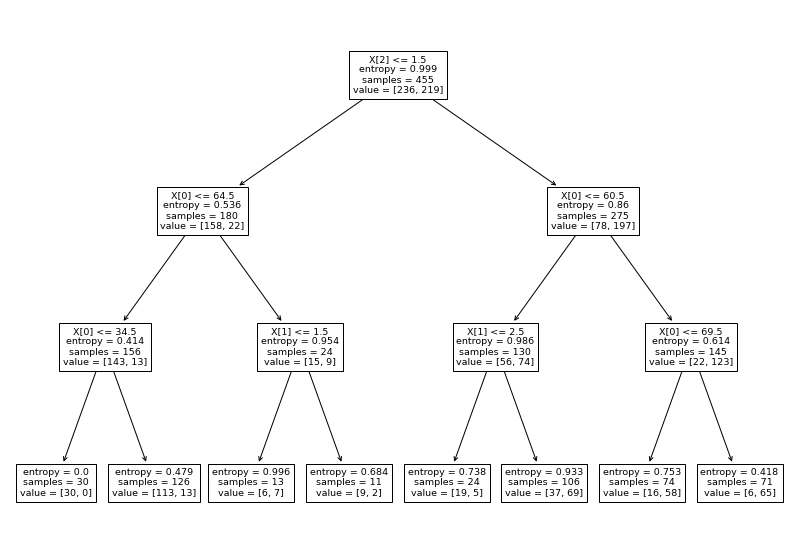

In [205]:
plt.figure(figsize=(14,10))
from sklearn import tree
tree.plot_tree(grid_search_model_mode.fit(X_train_mode, y_train_mode))

In [90]:
#define a base tree with basuc parameters 
base_tree = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_mode, y_train_mode)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.46520147e-04
 1.46520147e-04 2.01465201e-04 3.49650350e-04 3.66300366e-04
 3.66300366e-04 3.66300366e-04 3.66300366e-04 3.66300366e-04
 4.05748098e-04 4.39560440e-04 4.39560440e-04 5.49450549e-04
 5.63539025e-04 5.86080586e-04 6.59340659e-04 7.15381485e-04
 7.32600733e-04 7.32600733e-04 7.32600733e-04 7.32600733e-04
 8.37257980e-04 8.45308538e-04 8.79120879e-04 9.06845584e-04
 9.41915228e-04 1.05427905e-03 1.19483691e-03 1.28526444e-03
 1.29436864e-03 1.32953466e-03 1.38380138e-03 1.52456576e-03
 1.53497296e-03 1.53935298e-03 1.64653600e-03 1.66646540e-03
 1.74400498e-03 1.75824176e-03 1.83150183e-03 1.85592186e-03
 1.88383046e-03 1.89310689e-03 1.95804196e-03 2.04021331e-03
 2.15538438e-03 2.34432234e-03 2.38219055e-03 2.66400266e-03
 2.83259161e-03 2.92581205e-03 2.93040293e-03 3.01237224e-03
 3.79684418e-03 5.75035882e-03 7.38705739e-03 7.77777778e-03
 1.68513586e-02 2.34609740e-02 1.68807622e-01]


In [92]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_mode, y_train_mode)
    clfs.append(clf)

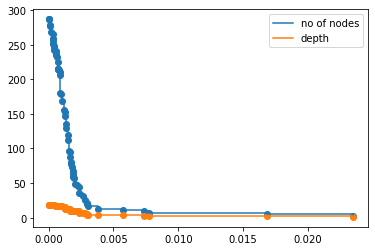

In [93]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

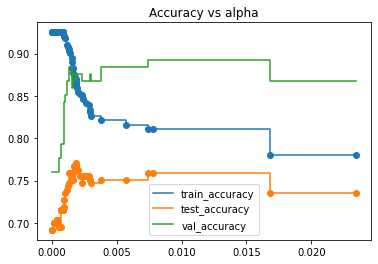

In [95]:
train_acc = []
test_acc = []
val_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train_mode)
    y_test_pred = c.predict(X_test_mode)
    y_val_pred= c.predict(X_val_mode)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
    val_acc.append(accuracy_score(y_val_pred,y_val))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,val_acc,label='val_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [97]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.005)
clf_.fit(X_train_mode,y_train_mode)
y_train_pred = clf.predict(X_train_mode)
y_test_pred = clf.predict(X_test_mode)
y_val_pred = clf.predict(X_val_mode)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
print(f'Test score {accuracy_score(y_val_pred,y_val)}')

Train score 0.5186813186813187
Test score 0.5059288537549407
Test score 0.5206611570247934


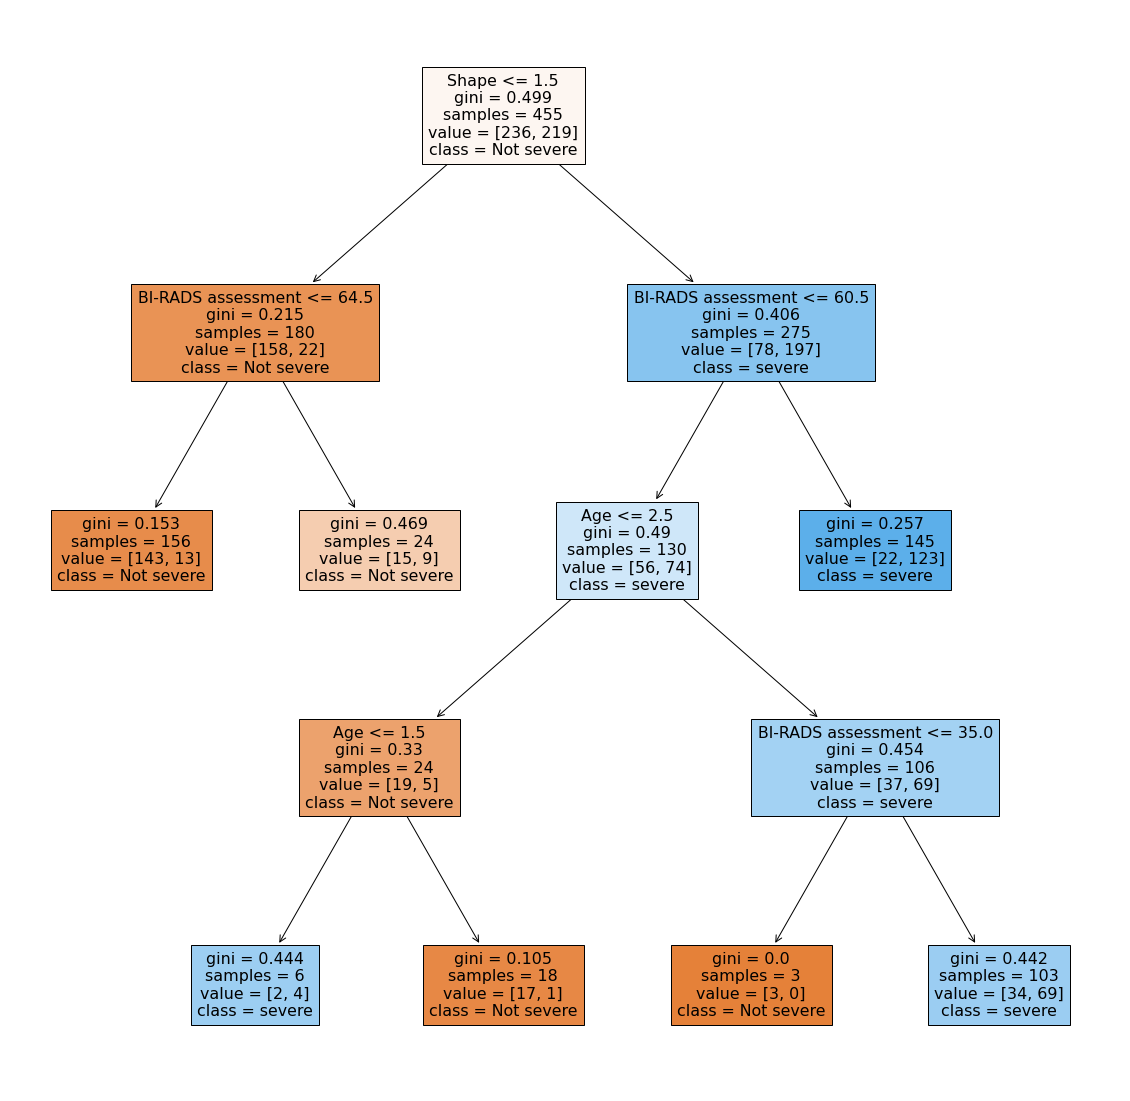

In [98]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not severe','severe']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

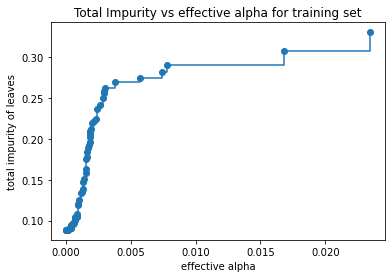

In [207]:
#In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [208]:
#we train a decision tree using the effective alphas. 
#The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.
base_trees = []
for ccp_alpha in ccp_alphas:
    base_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    base_tree.fit(X_train_mode, y_train_mode)
    base_trees.append(base_tree)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        base_trees[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16880762217025946


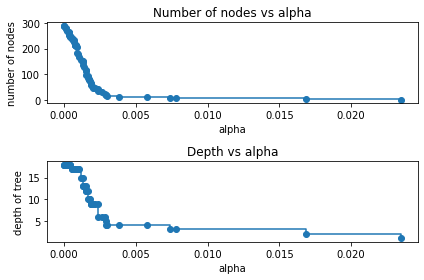

In [209]:
#Here we show that the number of nodes and tree depth decreases as alpha increases.
base_trees= base_trees[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [base_tree.tree_.node_count for base_tree in base_trees]
depth = [base_tree.tree_.max_depth for base_tree in base_trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

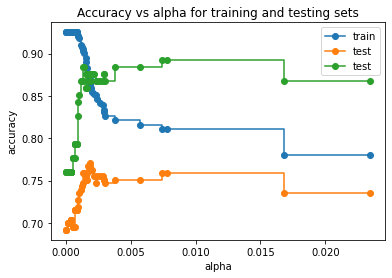

In [210]:
train_scores = [base_tree.score(X_train_mode, y_train_mode) for base_tree in base_trees]
test_scores = [base_tree.score(X_test_mode, y_test_mode) for base_tree in base_trees]
val_scores= [base_tree.score(X_val_mode, y_val_mode) for base_tree in base_trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. 
#As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better

In [211]:
forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
forest.fit(X_train_mode, y_train_mode)
print('Score: ', forest.score(X_train_mode, y_train_mode))

Score:  0.9252747252747253


In [212]:
print('Score: ', forest.score(X_test_mode, y_test_mode))
print('Score: ', forest.score(X_val_mode, y_val_mode))
print(forest.oob_score_)

Score:  0.7509881422924901
Score:  0.8181818181818182
0.7472527472527473


In [216]:
grid_space={'n_estimators':[25,50,75,100,125,150],
            'min_samples_split':[3,4,5,6,7,8],
            'max_features': [2,3,4]
           }

In [217]:
grid_rf = GridSearchCV(forest,param_grid=grid_space,cv=3,scoring='accuracy')
model_rf= grid_rf.fit(X_train_mode,y_train_mode)

In [218]:
print('Best hyperparameters are: '+str(model_rf.best_params_))
print('Best score is: '+str(model_rf.best_score_))

Best hyperparameters are: {'max_features': 3, 'min_samples_split': 7, 'n_estimators': 100}
Best score is: 0.7736580690135936


In [219]:
forest_gs= RandomForestClassifier(max_features= 3, min_samples_split= 7, n_estimators= 100, oob_score= True)
forest_gs.fit(X_train_mode, y_train_mode)
print('Score: ', forest_gs.score(X_train_mode, y_train_mode))

Score:  0.8813186813186813


In [221]:
print('Training set score: {:.4f}'.format(forest_gs.score(X_train_mode, y_train_mode)))
print('Test set score: {:.4f}'.format(forest_gs.score(X_test_mode, y_test_mode)))
print('Validation set score: {:.4f}'.format(forest_gs.score(X_val_mode, y_val_mode)))
print(forest_gs.oob_score_)

Training set score: 0.8813
Test set score: 0.7826
Validation set score: 0.8595
0.756043956043956


# Gradient boosted trees

In [164]:
X_train = df.drop(['Severity','BI-RADS assessment' ], axis=1)
y_train = df['Severity']
X_test = df1.drop(['Severity','BI-RADS assessment' ], axis=1)
y_test = df1['Severity']
X_val = df2.drop(['Severity','BI-RADS assessment' ], axis=1)
y_val = df2['Severity']

In [222]:
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold

In [166]:
!pip install xgboost

In [168]:
tree2 = XGBClassifier()

In [172]:
# grid search
n_estimators = [10,20,30,40,50]
learning_rate = [0.001, 0.01, 0.1]
subsample= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
max_depth= [4,5,6,7,8,9,10]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample= subsample, max_depth= max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(tree2, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [174]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.478536 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 30, 'subsample': 0.2}


In [175]:
tree_xg= XGBClassifier(learning_rate= 0.1, max_depth= 9, n_estimators= 30, subsample= 0.2, accuracy= 'score')

In [176]:
tree_xg.fit(X_train, y_train)

[15:03:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "accuracy" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(accuracy='score', base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=9, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [179]:
y_pred_test = tree_xg.predict(X_test)
y_pred_val = tree_xg.predict(X_val)
y_pred_train = tree_xg.predict(X_train)

In [180]:
print('test-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('validation-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val, y_pred_val)))
print('train-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

test-set accuracy score: 0.7951
validation-set accuracy score: 0.8741
train-set accuracy score: 0.8082
